In [24]:
import matplotlib.pyplot
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [9]:
hetf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero*')
velf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/velocity*')

In [10]:
hetf

['/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero_Nb50_migr0.25+_tau100_alpha0.03_ID43_demes200_2021-01-25-22-18-03.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero_Nb50_migr0.25+_tau50_alpha0.03_ID4_demes200_2021-01-25-22-37-27.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero_Nb50_migr0.25+_tau200_alpha0.03_ID20_demes200_2021-01-25-22-45-08.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero_Nb50_migr0.25+_tau50_alpha0.03_ID26_demes200_2021-01-25-22-37-27.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero_Nb50_migr0.25+_tau200_alpha0.03_ID52_demes200_2021-01-25-22-18-08.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero_Nb50_migr0.25+_tau100_alpha0.03_ID74_demes200_2021-01-25-22-18-03.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero_Nb50_migr0.25+_tau100_alpha0.03_ID25_demes200_

In [7]:
taus = np.array([50,100,200])
samps = 100

In [21]:
harr = np.zeros((len(taus), samps,5000 ))

for t, tau in enumerate(taus):
    for ID in range(1,samps+1):
        hetf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero*tau'+str(tau)+'_*ID'+str(ID)+'*')
        arr = np.loadtxt(hetf[0])[:,1]
        harr[t,ID-1,:len(arr)]=arr
        

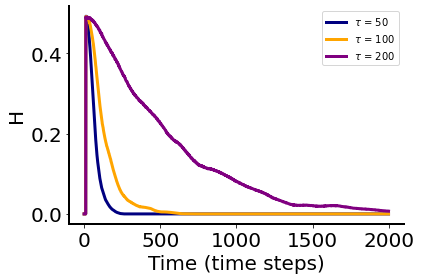

In [91]:
fig,ax = plt.subplots()
colors = ['navy', 'orange', 'purple', 'maroon','grey']
for i in range(3):
    ax.plot(np.mean(harr[i,:,:2000],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))



for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Time (time steps)',fontsize=20)
ax.set_ylabel('H',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.legend()

<ipython-input-78-492fd98f06ef>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.mean(harr[0,:,:1000],axis=0)))
<ipython-input-78-492fd98f06ef>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.mean(harr[1,:,:1000],axis=0)))
<ipython-input-78-492fd98f06ef>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.mean(harr[2,:,:1000],axis=0)))


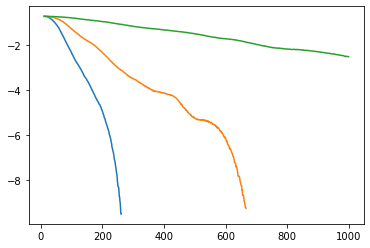

In [78]:
plt.plot(np.log(np.mean(harr[0,:,:1000],axis=0)))
plt.plot(np.log(np.mean(harr[1,:,:1000],axis=0)))
plt.plot(np.log(np.mean(harr[2,:,:1000],axis=0)))

In [65]:
tf = [200,400,1000]
rates = []

for i in range(3):
    rate = -np.polyfit(np.arange(tf[i]-15),np.log(np.mean(harr[i,:,15:tf[i]],axis=0)),1)[0]
    rates.append(rate)


In [56]:
np.polyfit(np.arange(985),np.log(np.mean(harr[2,:,15:1000],axis=0)),1)

array([-0.0019185 , -0.60657031])

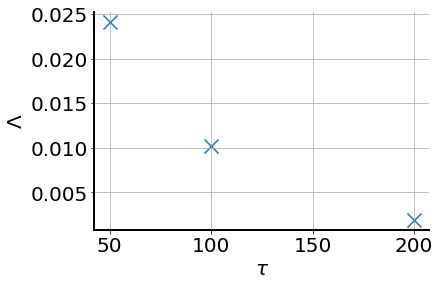

In [98]:
fig,ax= plt.subplots()
ax.scatter(taus,rates,marker = 'x',s=200)



for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$\tau$',fontsize=20)
ax.set_ylabel(r'$\Lambda$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.grid()

#ax.set_xscale('log')

#ax.set_yscale('log')

In [93]:
rates

[0.024084813430133797, 0.010228271850064304, 0.0019184969985088858]